<a href="https://colab.research.google.com/github/riddhi4599/DataScience-Assignment/blob/main/DS_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WEATHER ANALYSIS**


The project contains a 10-year weather dataset of a town in Hungary.
* Primary Source of data -  **climateinfo.gov**

In [ ]:
import urllib.request as urllib2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import time
import datetime as dt
from datetime import datetime
from matplotlib.pyplot import rcParams



In [ ]:
import csv
import requests
url = "https://www.kaggle.com/muthuj7/weather-dataset/download"

df = requests.get(url)

df.headers


{'Date': 'Tue, 29 Sep 2020 17:42:19 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Cache-Control': 'no-cache, no-store', 'Pragma': 'no-cache', 'Content-Encoding': 'gzip', 'Set-Cookie': 'CSRF-TOKEN=CfDJ8LdUzqlsSWBPr4Ce3rb9VL-Tcl_IvqkWpPBgBzP8Nj6IDSjlRs2jk_r2mCzyLfQx0nD9gnUUTqqmGySFJ8IPcwSD7ZC47lNFw8dq6DPkQcPlPR1zIoTkkZ09Z7zVPiiBIwQKkd64R3V7gshyfaQj4TA; path=/; secure; samesite=lax; httponly, XSRF-TOKEN=CfDJ8LdUzqlsSWBPr4Ce3rb9VL-vvGO6J4DKW8crGK4L6LUeOd4XJvJns9ENpDK-t8tASGg9a3HpfsTAfsG8adh2Eq3EywS5Nml7aTrf7l4LIJOzzLK5h_WDA0io9kW1dPV9ernrjH5CAtOxjRN0pDjOGHI; path=/; secure; samesite=lax, CLIENT-TOKEN=eyJhbGciOiJub25lIiwidHlwIjoiSldUIn0.eyJpc3MiOiJrYWdnbGUiLCJhdWQiOiJjbGllbnQiLCJzdWIiOm51bGwsIm5idCI6IjIwMjAtMDktMjlUMTc6NDI6MjAuNjA4MzMzOVoiLCJpYXQiOiIyMDIwLTA5LTI5VDE3OjQyOjIwLjYwODMzMzlaIiwianRpIjoiYjk5NmQzNDMtOWJhZC00MjRjLWEzMGItY2Y2OWIxNDgwYmRiIiwiZXhwIjoiMjAyMC0xMC0yOVQxNzo0MjoyMC42MDgzMzM5WiIsImFub24iOnRydWUsImZmIjpbIkZsZXhpYmxlR3B1IiwiS2VybmVsc0ludGVybmV0IiwiRGF0YUV4cGxvcmVyVjIiLCJ

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Elite_ Weather History Dataset - Sheet1.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* **Nominal data - 'Summary', 'Precip Type', 'Daily Summary'**
* **Interval data- 'temperature','Apparent temperature'**





In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39,15.5204,0,1016.16,Partly cloudy starting in the morning.


In [ ]:
df.shape

(96453, 12)

In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [ ]:
# check datatypes
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [ ]:
#Categorical variables:
categorical = df.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')


In [ ]:
#Quantitative variables:
quantitative = df.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)'],
      dtype='object')


In [ ]:
#Checking Null Values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
#filling null values
df['Precip Type'].fillna(method='ffill',inplace=True,axis=0)
df['Precip Type'].value_counts()


rain    85741
snow    10712
Name: Precip Type, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd07898d5f8>,
      dtype=object)

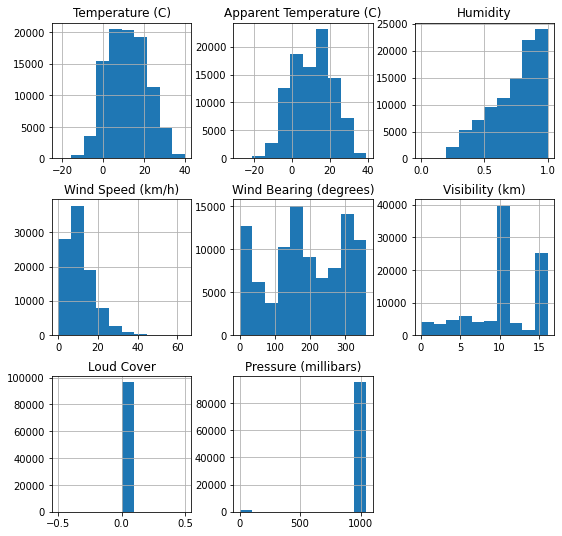

In [ ]:
#plotting histogram
rcParams['figure.figsize'] = 9, 9
df[quantitative].hist()

In [ ]:
df=df.drop('Loud Cover',axis=1)


In [ ]:
df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

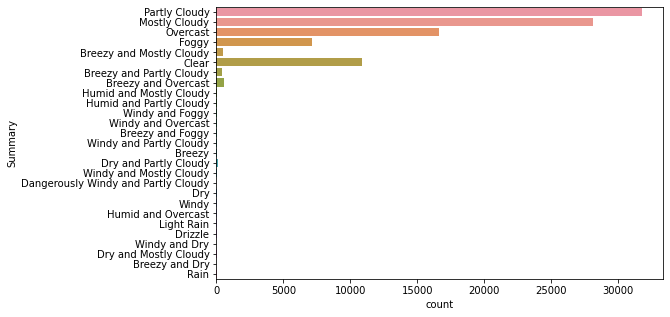

In [ ]:
#countplot on summary column
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=df['Summary'])

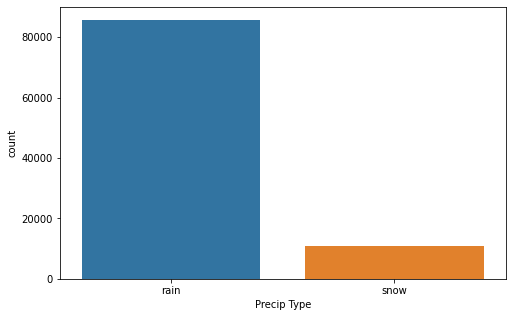

In [ ]:
sns.countplot(x=df['Precip Type'])

Formatted Date
Summary
Precip Type
Temperature (C)
Apparent Temperature (C)
Humidity
Wind Speed (km/h)
Wind Bearing (degrees)
Visibility (km)
Pressure (millibars)
Daily Summary


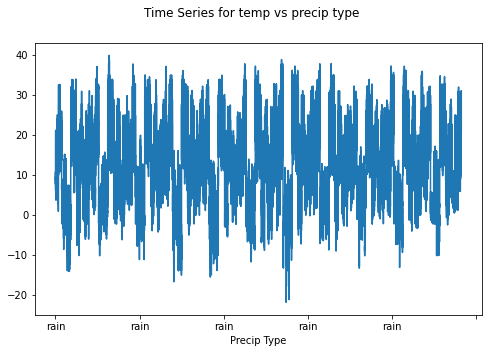

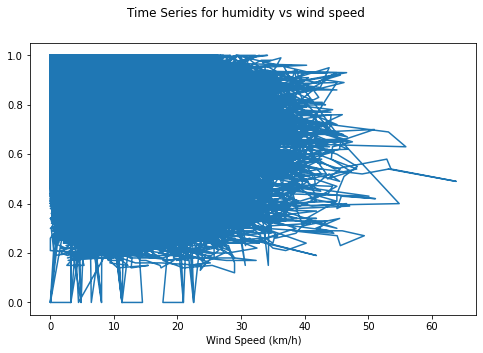

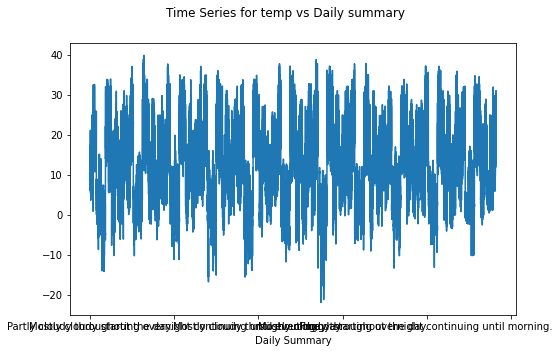

In [ ]:
import matplotlib.pyplot as plt
for col in df.columns:
  print(col)
ts = pd.Series(df['Temperature (C)'].values, index=df['Precip Type'])
fig = plt.figure()
plt.suptitle('Time Series for temp vs precip type')
ts.plot()

ts1 = pd.Series(df['Humidity'].values, index=df['Wind Speed (km/h)'])
fig = plt.figure()
plt.suptitle('Time Series for humidity vs wind speed')
ts1.plot()

ts2 = pd.Series(df['Temperature (C)'].values, index=df['Daily Summary'])
fig = plt.figure()
plt.suptitle('Time Series for temp vs Daily summary')
ts2.plot()



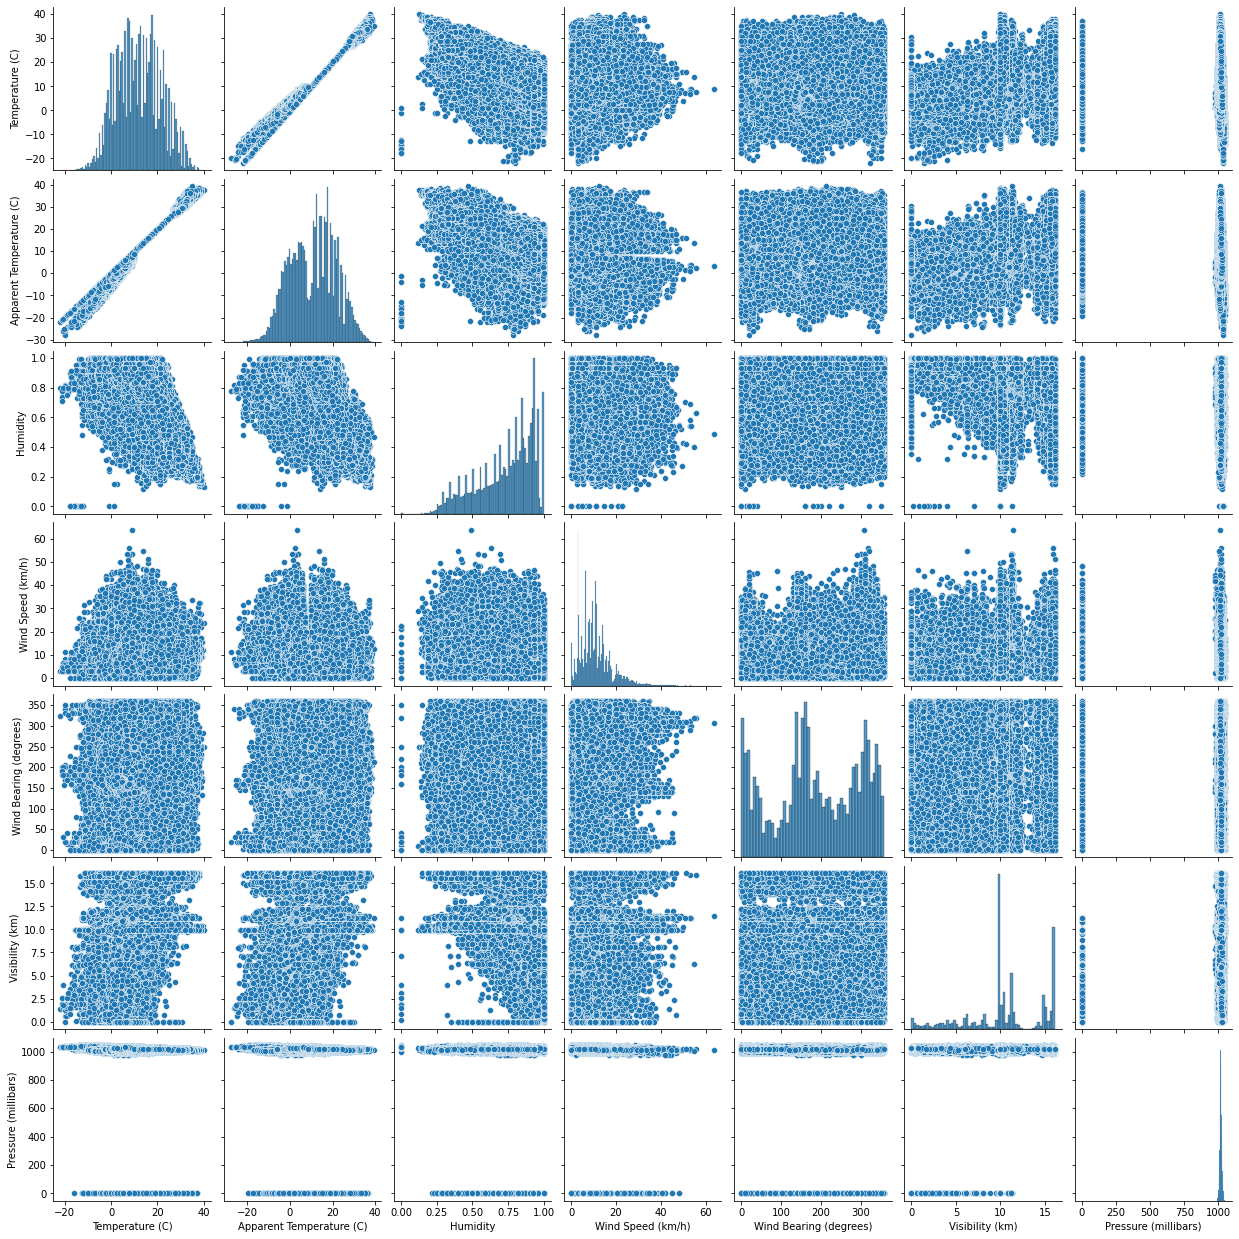

In [ ]:
import seaborn as sns
sns.pairplot(df,palette='coolwarm')
#note that the histograms(along the diagnol) are marginal distributions and the rest(scatter plots) are joint distributions

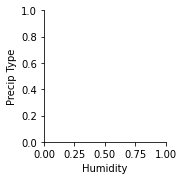

In [ ]:
g = sns.pairplot(df, x_vars=['Humidity'], y_vars=['Precip Type'])



<Figure size 576x360 with 0 Axes>

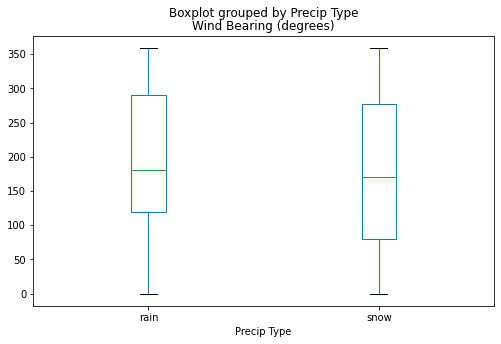

Formatted Date
Summary
Precip Type
Temperature (C)
Apparent Temperature (C)
Humidity
Wind Speed (km/h)
Wind Bearing (degrees)
Visibility (km)
Pressure (millibars)
Daily Summary


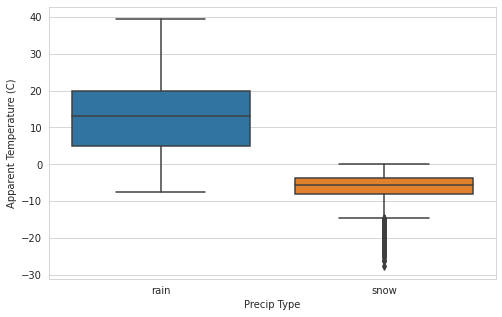

In [ ]:
from pandas import DataFrame
import seaborn as sns
# Create the boxplot
fig = plt.figure()
plt.suptitle('BoxPlot for Wind Degrees according to precip type')
df.boxplot( by='Precip Type', column = ['Wind Bearing (degrees)'], grid = False)
plt.show()

for col in df.columns:
  print(col)

sns.set_style("whitegrid") 
  
sns.boxplot(x = 'Precip Type', y = 'Apparent Temperature (C)', data = df) 


In [ ]:
#pip install pmdarima

In [ ]:
#pip install statsmodels --upgrade

In [ ]:
from statsmodels.tsa.arima_model import ARIMA #the statsmodel lets you fit ARIMA model; It's parameters are a-lag, d- difference, d-moving average

**HYPOTHESIS TESTING**

In [ ]:
df['Temperature (C)'].mean()

11.932678437519508

**Z Test** = (x̄ – μ) / (σ / √n)

*   Null Hypothesis H0 : μ = 12 
*   Alternate Hypothesis Ha : μ ≠ 12



*   Step 1: Create the hypothesis (Null and Alternate Hypothesis)
*   Step 2: Appropriate statistical test
*   Step 3: let set α as 0.05 
*   Step 4: Get data
*   Step 5: Analyze


**This is 2 sided test**

*   value of z at 0.05 making it 0.025 for 2 sided we known from ztable +-1.96


In [ ]:
data=df['Temperature (C)'][np.argsort(np.random.random(1000))[:70]]

In [ ]:
meanData=data.mean()
hypMean=12
N=70
standPop=np.std(df['Temperature (C)'])

In [ ]:
import math
(meanData-hypMean)/(standPop/math.sqrt(N))

3.354388485125188

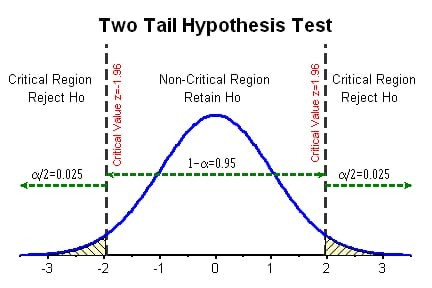

*   As calculated z score 2.34 is greater than +1.96 (tabular z score), we reject the null hypothesis

*   If also we would have got -2.34 is less than -1.96 we would have rejected the null hypothesis


*   Observed value = 2.34
*   Critical value = +1.96

**p-value**

*   The p-value defines the smallest probability (α) for which the null hypothesis can be rejected.
*   Let's say α = 0.05


*   if p <= 0.05 strong evidence against the H), hence reject the Null Hypothesis
*   if p > 0.05 weak evidence against the H0, hence fail to reject the Null Hypothesis
*   if near to 0.05  not sure




*Example*

*   Let's say observed z value is 2.34 = 0.9904
*   The p-value would be 1-0.990 = 0.01
*   using the above info we can reject the H0 at α = 0.05
*   but we will fail to reject the H0 at α = 0.1 
*   as   0.1 > 0.01 but < 0.05
